In [1]:
# dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
# load data
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

df = pd.read_csv(url, names=column_names)
print("Number of samples: %d" % len(df))
df.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Write a code that shows how many unique values are in the 'sex' column

In [13]:
df.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

#### Correlation

<AxesSubplot:>

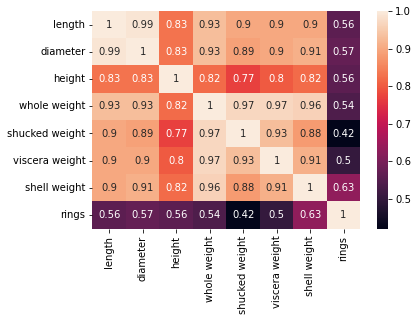

In [3]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

According to the correlation matrix, shucked weight, viscera weight have the highest correlation coefficient, which would result in more accurate score in prediction in linear regression.

#### Assume that we want to estimate weigth of a sample through linear regression, based on the correlation matrix suggest two predictors.

In [5]:
#predictors
X = df[['length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings']]

#target
y = df['sex']

In [7]:
# the test set will be 30% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Why we break our dataset into test and train?

Typically, we separate a data set into a training set and testing set, most of the data is used for training, and a smaller poration of the data is used for testing. We randomly sample the data to ensure that the testing and training sets are similar. 

Data split prevent the model from overfitting and to evaluate the model more effectively.

#### Explain logistic regression algorithm?

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable (categorical prediction), although many more complex extensions exist.

In [8]:
#Build the Logistic regression object
logisticRegr = LogisticRegression(solver='liblinear',fit_intercept=True)
#use logistic model to fit training data
logisticRegr.fit(X_train, y_train)
#generate predicted classes for test data
logis_pred = logisticRegr.predict(X_test)
#generate predicted probabilites for test data
logis_pred_prob = logisticRegr.predict_proba(X_test)

In [9]:
#Build a "dummy" classifier that predicts every observation to be the most frequent class, in this case 'no-exit')
dummy = DummyClassifier(strategy= 'most_frequent')
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

In [10]:
print("Test accuracy (Logistic Regression) =", logisticRegr.score(X_test,y_test), end="\n\n")

print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Test accuracy (Logistic Regression) = 0.5685805422647527

Test accuracy (Dummy Classifier) = 0.3652312599681021


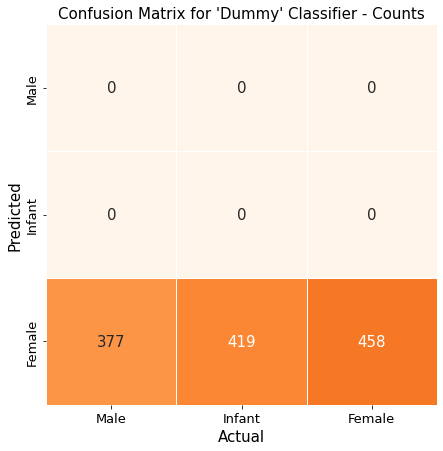

In [15]:
#generate confusion matrix for Dummy classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
#put it into a dataframe for seaborn plot function
cm_dummy_df = pd.DataFrame(cm_dummy)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Male","Infant", 'Female'], yticklabels=["Male","Infant", 'Female'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Male","Infant", 'Female'], fontsize=13)
ax.set_yticklabels(["Male","Infant", 'Female'], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)

plt.show()

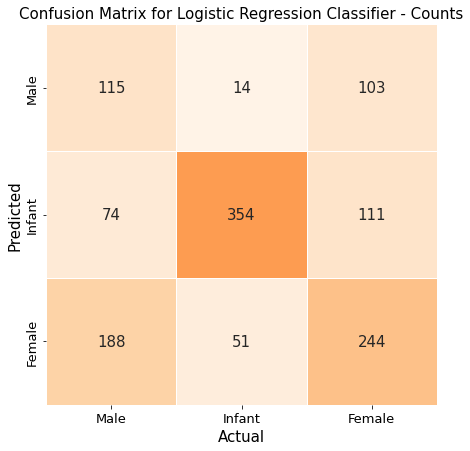

In [16]:
#generate confusion matrix for Logistic Regression classifier
cm_logis = confusion_matrix(y_test, logis_pred)
#put it into a dataframe for seaborn plot function
cm_logis_df = pd.DataFrame(cm_logis)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_logis_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Male","Infant", 'Female'], yticklabels=["Male","Infant", 'Female'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Male","Infant", 'Female'], fontsize=13)
ax.set_yticklabels(["Male","Infant", 'Female'], fontsize=13)
plt.title("Confusion Matrix for Logistic Regression Classifier - Counts", fontsize=15)

plt.show()

#### Assume that we are interested in predicting Infants, what is the value of the following parameters (use the Confusion Matrix for Logstic Regression Classifier):

True Postive: 354

True Negative: 115+244 = 359

Recall: True Postive/(True Negative + True Postive) = 354/(354+74+111) = 65.68%

#### Why do we make a distinction between type 1 and type 2 errors? Use an example to convey your point.

In statistics, a Type I error is a false positive conclusion, while a Type II error is a false negative conclusion.

The cost of making different erroes are different. 

* Type I error example: The test result say you have Covid-19, but you actually don't have it.
* Type II error example: The test result says you don't have Covid-19, but you actually do have it.

#### What is the difference between clustering and classification?

The difference lies in the fact that classification uses predefined classes in which objects are assigned, while clustering identifies similarities between objects, which it groups according to those characteristics in common and which differentiate them from other groups of objects. These groups are known as "clusters".

Classification is the process of classifying the data with the help of class labels whereas, in clustering, there are no predefined class labels.

Classification is supervised learning, while clustering is unsupervised learning.